## 参考文献
つくりながら学ぶ！深層強化学習 （著者）株式会社電通国際情報サービス 小川雄太郎<br>
方策勾配法の部分を参考にしました.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 変数定義

In [27]:
# 変数
maze_size = 7
maze_x = maze_size
maze_y = maze_size
maze_matrix = []

## 迷路構築関数

[[1. 1. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 0. 1.]
 [0. 1. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 0. 1.]
 [1. 0. 1. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0. 0. 1.]
 [1. 1. 0. 1. 0. 1. 1.]]


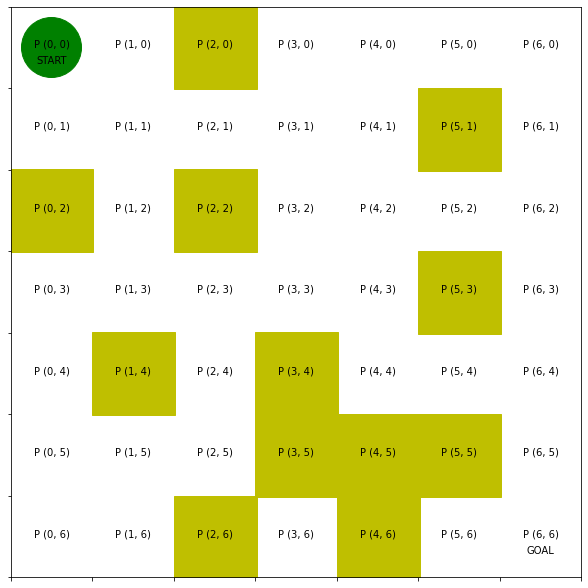

In [16]:
def DrawMaze(x_size, y_size):
        fig = plt.figure(figsize=(x_size * 1.5, y_size * 1.5))
        ax = plt.gca()
        ax.set_aspect(1)
        ax.tick_params(labelbottom=False,
               labelleft=False,
               labelright=False,
               labeltop=False)
        ax.set_xlim(0, x_size)
        ax.set_ylim(0, y_size)
        
        maze_array = np.ones((x_size, y_size, ))
        
        robot, = ax.plot([0.5], [y_size - 0.5], marker="o", color='g', markersize=60)
        plt.text(0.5, y_size - 0.7, 'START', ha='center')
        plt.text(x_size - 0.5, 0.3, 'GOAL', ha='center')
        
        for x in range(x_size):
            y_num = y_size - 0.5 - x
            for y in range(y_size):
                x_num = 0.5 + y 
                plt.text(x_num, y_num, 'P (' + str(y) + ', ' + str(x) + ')', size=10, ha='center')
                if x + y != 0 and x + y != x_size + y_size - 2:
                    if np.random.rand() > 0.8:
                        maze_array[x][y] = 0
                        wall, = ax.plot([x_num], [y_num], marker="s", color='y', markersize=83)

        return fig, robot, maze_array
    
maze = DrawMaze(maze_x, maze_y)
fig = maze[0]
robot = maze[1]
maze_matrix = maze[2]

print(maze_matrix)

## 方策パラメータ

In [17]:
def create_theta(matrix):
    theta_0 = np.empty((0, 4), int)
    [m, n] = matrix.shape
    
    for j in range(0, m):
        for i in range(0, n):
            direction = [np.nan, np.nan, np.nan, np.nan] # ↑ → ↓ ←
    
            if j != 0:
                if matrix[j - 1][i] == 1:
                    direction[0] = 1
            if i != maze_x - 1:
                if matrix[j][i + 1] == 1:
                    direction[1] = 1
            if j != maze_y - 1:
                if matrix[j + 1][i] == 1:
                    direction[2] = 1
            if i != 0:
                if matrix[j][i - 1] == 1:
                    direction[3] = 1
            
            theta_0 = np.append(theta_0, np.array([direction]), axis=0)

    return theta_0

theta_0 = create_theta(maze_matrix)
print(theta_0)

[[nan  1.  1. nan]
 [nan nan  1.  1.]
 [nan  1.  1.  1.]
 [nan  1.  1. nan]
 [nan  1.  1.  1.]
 [nan  1. nan  1.]
 [nan nan  1.  1.]
 [ 1.  1. nan nan]
 [ 1.  1.  1.  1.]
 [nan  1. nan  1.]
 [ 1.  1.  1.  1.]
 [ 1. nan  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1. nan  1. nan]
 [ 1.  1.  1. nan]
 [ 1. nan  1. nan]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1. nan]
 [ 1.  1.  1.  1.]
 [nan  1. nan  1.]
 [ 1. nan  1.  1.]
 [nan  1.  1. nan]
 [ 1.  1. nan  1.]
 [nan  1.  1.  1.]
 [ 1.  1. nan  1.]
 [ 1. nan  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1. nan  1. nan]
 [ 1. nan  1. nan]
 [ 1.  1.  1.  1.]
 [ 1. nan  1. nan]
 [ 1.  1. nan  1.]
 [ 1.  1. nan nan]
 [nan  1. nan  1.]
 [ 1. nan  1.  1.]
 [ 1.  1.  1. nan]
 [nan  1.  1.  1.]
 [ 1. nan nan  1.]
 [nan nan  1.  1.]
 [ 1. nan nan nan]
 [ 1.  1.  1. nan]
 [ 1. nan  1. nan]
 [ 1.  1. nan nan]
 [ 1. nan nan  1.]
 [ 1.  1. nan  1.]
 [nan nan nan nan]
 [nan  1. nan  1.]
 [nan  1. nan nan]
 [ 1. nan nan  1.]]


## 方策パラメータ→行動方策 変換関数

In [18]:
def softmax_convert_into_pi_from_theta(theta):
 
    beta =1.0
    [m, n] = theta.shape
    pi = np.zeros((m, n))
 
    exp_theta = np.exp(beta*theta)
 
    for i in range(0, m):
        pi[i, :] = exp_theta[i, :] / np.nansum(exp_theta[i, :])
    pi = np.nan_to_num(pi)
 
    return pi

pi_0 = softmax_convert_into_pi_from_theta(theta_0)
print(pi_0)

[[0.         0.5        0.5        0.        ]
 [0.         0.         0.5        0.5       ]
 [0.         0.33333333 0.33333333 0.33333333]
 [0.         0.5        0.5        0.        ]
 [0.         0.33333333 0.33333333 0.33333333]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.5        0.5        0.         0.        ]
 [0.25       0.25       0.25       0.25      ]
 [0.         0.5        0.         0.5       ]
 [0.25       0.25       0.25       0.25      ]
 [0.33333333 0.         0.33333333 0.33333333]
 [0.25       0.25       0.25       0.25      ]
 [0.5        0.         0.5        0.        ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.5        0.         0.5        0.        ]
 [0.25       0.25       0.25       0.25      ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.25       0.25       0.25       0.25      ]
 [0.         0.5        0.         0.5       ]
 [0.33333333 0.         0.33333333 0.33333333]
 [0.         

## 1step 後の行動を決める関数

In [6]:
def next_step(pi, s):
    direction = ["up", "right", "down", "left"]
    
    next_action = np.random.choice(direction, size=1, replace=True, p=pi[s, :])
    
    if next_action == "up":
        s_next = s - maze_y
        action_index = 0
    elif next_action == "right":
        s_next = s + 1
        action_index = 1
    elif next_action == "down":
        s_next = s + maze_y
        action_index = 2
    elif next_action == "left":
        s_next = s - 1
        action_index = 3

    return action_index, s_next

## 方策更新関数
### 方策勾配法

$θ_{s_i, a_j} ← θ_{s_i, a_j} + η・Δθ_{s_i, a_j}$

$Δθ_{s_i, a_j} = N(s_i, a_j) + P(s_i, a_j)N(s_i, a_j)/T$


In [22]:
def update_theta(theta, pi, action_history):
    eta = 0.1
    T = len(action_history) - 1
 
    [m, n] = theta.shape
    delta_theta = theta.copy()
 
    for i in range(0, m):
        for j in range(0, n):
            if theta[i, j] != np.nan:
                SA_i = [SA for SA in action_history if SA[0] == i]
                SA_ij = [SA for SA in action_history if SA == [i, j]] 
                N_i = len(SA_i)
                N_ij = len(SA_ij)
                delta_theta[i, j] = (N_ij + pi[i, j] * N_i) / T
 
    new_theta = theta + eta * delta_theta
 
    return new_theta

## 迷路攻略関数

In [26]:
def clear_maze(pi):
    s = 0    
    action_history = [[0, np.nan]]
    
    while True:
        [action, next_s] = next_step(pi, s)
        action_history[-1][1] = action
        
        if s == maze_x * maze_y - 1:
            break
        else:
            action_history.append([next_s, np.nan])
            s = next_s
            
    return action_history     

## 実行

In [24]:
stop_epsilon = 10**-8

theta = theta_0
pi = pi_0
 
is_continue = True
count = 1
while is_continue:
    action_history = clear_maze(pi)
    new_theta = update_theta(theta, pi, action_history)
    new_pi = softmax_convert_into_pi_from_theta(new_theta)
 
    print(np.sum(np.abs(new_pi - pi)))
    print("迷路を解くのにかかったステップ数は" + str(len(action_history) - 1) + "です")
 
    if np.sum(np.abs(new_pi - pi)) < stop_epsilon:
        is_continue = False
    else:
        theta = new_theta
        pi = new_pi

0.015080871740032975
迷路を解くのにかかったステップ数は70です
0.0071944942258123645
迷路を解くのにかかったステップ数は798です
0.017454857412576463
迷路を解くのにかかったステップ数は174です
0.011984414808354132
迷路を解くのにかかったステップ数は342です
0.01626680608143735
迷路を解くのにかかったステップ数は114です
0.0229345174403551
迷路を解くのにかかったステップ数は56です
0.010007518888974859
迷路を解くのにかかったステップ数は372です
0.009186321435285472
迷路を解くのにかかったステップ数は458です
0.010783229176868664
迷路を解くのにかかったステップ数は286です
0.015467763530819523
迷路を解くのにかかったステップ数は132です
0.013632648300872435
迷路を解くのにかかったステップ数は264です
0.008527315469328556
迷路を解くのにかかったステップ数は686です
0.010622872622367663
迷路を解くのにかかったステップ数は372です
0.02155759807101515
迷路を解くのにかかったステップ数は50です
0.014698991262259709
迷路を解くのにかかったステップ数は156です
0.016164573986367642
迷路を解くのにかかったステップ数は150です
0.010887292716987157
迷路を解くのにかかったステップ数は330です
0.01576449822705933
迷路を解くのにかかったステップ数は108です
0.008147893127635697
迷路を解くのにかかったステップ数は678です
0.027694559655626144
迷路を解くのにかかったステップ数は54です
0.014235804683297909
迷路を解くのにかかったステップ数は242です
0.03291320112051757
迷路を解くのにかかったステップ数は28です
0.01049103652233277
迷路を解くのにかかったステップ数は442です

In [25]:
from matplotlib import animation
from IPython.display import HTML

def init():
    '''背景画像の初期化'''
    robot.set_data([], [])
    return (robot,)

def animate(i):
    '''フレームごとの描画内容'''
    state = action_history[i][0]  # 現在の場所を描く
    x = (state % maze_y) + 0.5
    y = maze_y - 0.5 - int(state / maze_y)
    robot.set_data(x, y)
    return (robot,)

#　初期化関数とフレームごとの描画関数を用いて動画を作成する
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(
    action_history), interval=200, repeat=False)

HTML(anim.to_jshtml())